# Gateway to Research

This notebook loads and shows the Gateway to Research data

Check this [repo](https://github.com/nestauk/gtr_data_processing) for additional information about the GtR data.

# Preamble

In [1]:
%run notebook_preamble.ipy

In [2]:
# Functions etc here
import re
from pylab import *
from plotnine import * 
import geopandas as gpd
from string import punctuation
from pyproj import Proj

def flatten_list(a_list):
    return([x for el in a_list for x in el])

# Analysis of pre-processed data

In [ ]:
#Reads in the data that has been processed for university effects

    
    
my_path = 'filepath/060819_gtr_creative_sect.csv'


gtr = pd.read_csv(my_path,compression='zip',na_values='[]').iloc[:,1:]


In [4]:
list(gtr)

['project_id',
 'title',
 'abstract',
 'year',
 'funder',
 'status',
 'grant_category',
 'amount',
 'out_prod',
 'out_tech',
 'out_spin',
 'out_pubs',
 'out_db',
 'research_topics',
 'research_activities',
 'disc_maths_comp',
 'disc_eng_tech',
 'disc_env',
 'disc_social',
 'disc_physics',
 'disc_medical',
 'disc_biological',
 'disc_arts_humanities',
 'ind_construction_construction',
 'ind_manufacture_aerospace',
 'ind_manufacture_chemical',
 'ind_manufacture_electronics',
 'ind_manufacture_materials',
 'ind_manufacture_metal_equipment',
 'ind_manufacture_paper',
 'ind_manufacture_pharmaceuticals',
 'ind_manufacture_plastics',
 'ind_primary_fishing',
 'ind_services_administrative',
 'ind_services_agricultural',
 'ind_services_computing',
 'ind_services_consumer_retail',
 'ind_services_content',
 'ind_services_creative',
 'ind_services_cultural',
 'ind_services_education_post_primary',
 'ind_services_education_primary',
 'ind_services_electronics_machinery',
 'ind_services_energy',
 'ind

In [5]:
gtr.head(n=5)

,project_id,title,abstract,year,funder,status,grant_category,amount,out_prod,out_tech,...,companyname,cluster,sic_4,descr,org_sector_pairs,comp_sectors,creative_sector,creative_org,creative_sector_pres,creative_flag_semantic
0,52405730-6906-4BDD-B9FC-FEB8E6C97E84,Burning fat: an in vivo and in vitro study of ...,People in the UK are getting fatter and this h...,2012,BBSRC,Closed,Research Grant,363926,0.0,0.0,...,['GLAXOSMITHKLINE PLC'],['services_financial_legal'],['7010'],['Activities of head offices'],{'glaxosmithkline plc': '7010'},{'glaxosmithkline plc': '7010'},{'glaxosmithkline plc': 'not_creative'},NaN,['none_creative'],False
1,82E47A5E-A4C6-4F70-9242-821EFC9456D7,University of the West of Scotland Nuclear Phy...,It is just over 100 years since Ernest Rutherf...,2014,STFC,Active,Research Grant,379758,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,05BE79C5-AF13-4A67-B042-3BCE38D575A2,Transcription factor hierarchies underlying th...,"Our sense of hearing, and the information we u...",2017,BBSRC,Active,Research Grant,351052,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,35A67FD7-CDEB-4D9A-95E0-404F03D1A57E,The webs of copyright in countries of the glob...,Can it be humane that copyright restrictions p...,2008,AHRC,Closed,Research Grant,25557,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6A660023-1ACB-4804-9D46-424F7AD7F46A,Next generation paper,The technology of paper is so old and so ubiqu...,2017,EPSRC,Active,Research Grant,953077,0.0,0.0,...,"['LIBRIOS LIMITED', 'BRADT TRAVEL GUIDES LTD.']","['services_publishing', 'services_publishing']","['5829', '5811']","['Other software publishing', 'Book publishing']","{'librios limited': '5829', 'bradt travel guid...","{'librios limited': '5829', 'bradt travel guid...","{'librios limited': 'IT, software and computer...","['librios limited', 'bradt travel guides ltd.']","['IT, software and computer services', 'Publis...",True


In [6]:
gtr['creative_sector'].value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       20203
{'john innes centre': 'not_creative'}                                                                                                                                                                                                                                                                                                                                                                                                                                                    

# Creates a flag for all the categories and individual flags to handle the individual components i.e.

 a=['Museums, galleries and libraries', 'Film, TV, video, radio and photography' 'Design','Architecture','Publishing' , 'Advertising and marketing','Crafts', 'IT,software and computer services', 'Music, performing and visual arts']

In [7]:
creative_industry=['Museums, galleries and libraries', 'Film, TV, video, radio and photography' 'Design','Architecture','Publishing' , 'Advertising and marketing','Crafts', 'IT, software and computer services', 'Music, performing and visual arts']


#General creative function
def creativesearch(x):
 regex = re.compile("|".join(word for word in creative_industry), re.IGNORECASE)
 if regex.search(x):
    return 1 #This is done as you can't subset dataset with None and not equals operator
 else:
   return 0

#Domain function
def domain(x,y): # y is the word x is the column it is applied to
 regex = re.compile(y, re.IGNORECASE)
 if regex.search(x):
    return 1 #This is done as you can't subset dataset with None and not equals operator
 else:
   return 0


#Set as string
gtr[['creative_sector']]=gtr[['creative_sector']].astype(str)


#Apply functions
gtr['creative_flag']=gtr[['creative_sector']].applymap(creativesearch)

#Creates sector flags for each category
for elem in creative_industry:
 gtr[elem]=gtr[['creative_sector']].applymap(lambda x:domain(x, elem))
 
gtr.head(n=6)

,project_id,title,abstract,year,funder,status,grant_category,amount,out_prod,out_tech,...,creative_flag_semantic,creative_flag,"Museums, galleries and libraries","Film, TV, video, radio and photographyDesign",Architecture,Publishing,Advertising and marketing,Crafts,"IT, software and computer services","Music, performing and visual arts"
0,52405730-6906-4BDD-B9FC-FEB8E6C97E84,Burning fat: an in vivo and in vitro study of ...,People in the UK are getting fatter and this h...,2012,BBSRC,Closed,Research Grant,363926,0.0,0.0,...,False,0,0,0,0,0,0,0,0,0
1,82E47A5E-A4C6-4F70-9242-821EFC9456D7,University of the West of Scotland Nuclear Phy...,It is just over 100 years since Ernest Rutherf...,2014,STFC,Active,Research Grant,379758,0.0,0.0,...,NaN,0,0,0,0,0,0,0,0,0
2,05BE79C5-AF13-4A67-B042-3BCE38D575A2,Transcription factor hierarchies underlying th...,"Our sense of hearing, and the information we u...",2017,BBSRC,Active,Research Grant,351052,0.0,0.0,...,False,0,0,0,0,0,0,0,0,0
3,35A67FD7-CDEB-4D9A-95E0-404F03D1A57E,The webs of copyright in countries of the glob...,Can it be humane that copyright restrictions p...,2008,AHRC,Closed,Research Grant,25557,0.0,0.0,...,False,0,0,0,0,0,0,0,0,0
4,6A660023-1ACB-4804-9D46-424F7AD7F46A,Next generation paper,The technology of paper is so old and so ubiqu...,2017,EPSRC,Active,Research Grant,953077,0.0,0.0,...,True,1,0,0,0,1,0,0,1,0
5,C82AD03A-DB87-4B26-A233-D5A55CC549B2,Delivering Contemporary CBT Interventions to U...,<p>This programme of follow-on work will see D...,2012,ESRC,Closed,Research Grant,18464,0.0,0.0,...,False,0,0,0,0,0,0,0,0,0


# Does the count of ai by the different creative sectors

In [8]:
#Sums the dataframe by AI status
countby_ai_status=gtr.groupby(['ai_mod']).sum()

#Drops most of the variables, except the ones we want
countby_ai_status=countby_ai_status[creative_industry+['creative_flag']]

#Pastes to clipboard
countby_ai_status.to_clipboard()

Text(0,0.5,'Number of AI related projects')

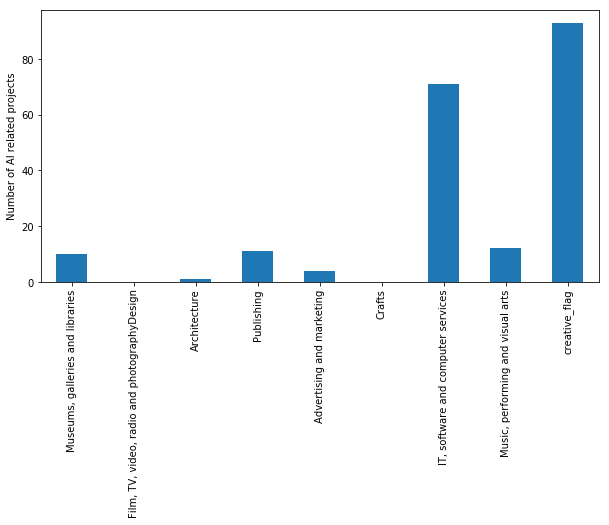

In [9]:
ax=countby_ai_status.loc[True , : ].plot.bar(figsize=(10,5))
ax.set_ylabel('Number of AI related projects')

In [10]:
#view_the_abstracts=gtr['abstract'][(gtr['ai_mod']==True) &  (gtr['creative_flag']==1)]


# Looks at how the number of projects is changing over time

AI projects

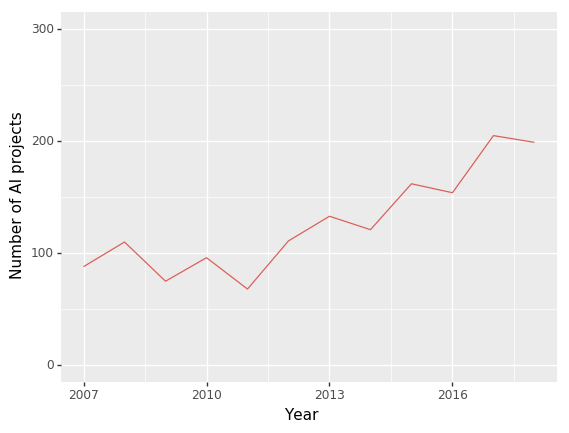

<ggplot: (-9223371888583344829)>

In [11]:


(ggplot(gtr[gtr['ai_mod']==True],aes(x='year',group='ai_mod',color='ai_mod'))+
  geom_freqpoly(binwidth = 1, show_legend=False) +xlab("Year")+ylab("Number of AI projects")+xlim(2007,2018)+ylim(0,300))

Creative projects

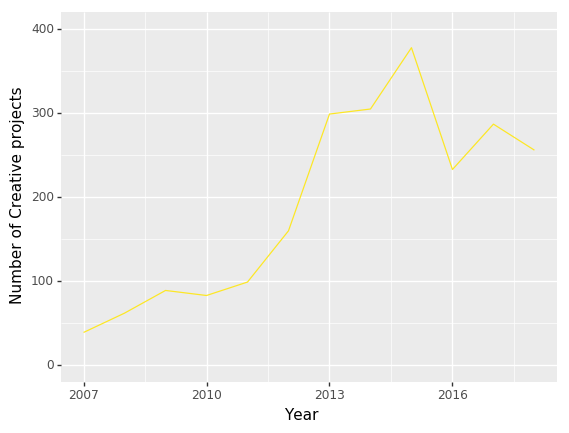

<ggplot: (-9223371888583344668)>

In [12]:
#Was creative_flag_semantic
(ggplot(gtr[gtr['creative_flag']==True],aes(x='year',group='creative_flag',color='creative_flag'))+
  geom_freqpoly(binwidth = 1, show_legend=False) +xlab("Year")+ylab("Number of Creative projects")+xlim(2007,2018)+ylim(0,400))

AI and Creative projects

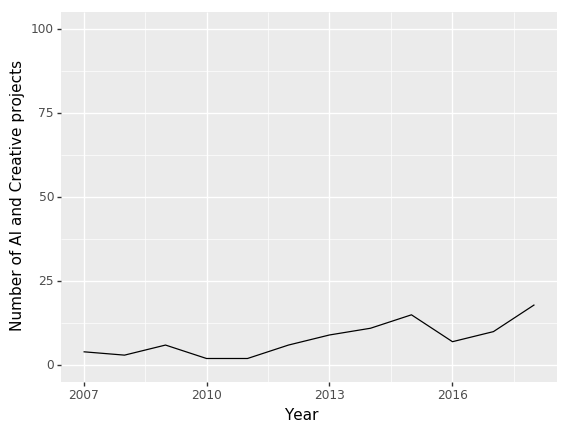

<ggplot: (148272171840)>

In [13]:
(ggplot(gtr[(gtr['creative_flag']==True) & (gtr['ai_mod']==1)],aes(x='year'))+
  geom_freqpoly(binwidth = 1, show_legend=False) +xlab("Year")+ylab("Number of AI and Creative projects")+xlim(2007,2018)+ylim(0,100))

# Spatial analysis

In [14]:
#Loads data

stem="filepath"

files="Local_Authority_Districts_December_2017_Super_Generalised_Clipped_Boundaries_in_United_Kingdom_WGS84.shp"

#proje="+proj=utm +zone=33 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"

UK_lad=gpd.read_file(stem+files)

UK_lad.crs

#Sets the projection

#UK_lad = UK_lad.to_crs({'init' :'epsg:25832'})


{'init': 'epsg:4277'}

Note: Issue in the projection to resolve

(-9.171386523031673, 2.2823282475644793, 49.31566434330722, 61.409907721760426)

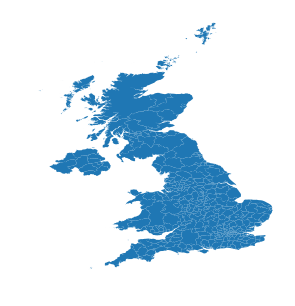

In [15]:
#Check it's loaded
ax=UK_lad.plot( figsize=(5, 5))
ax.set_title('')
ax.axis('off')

 Does spatial counts of local authorities

In [ ]:
#Sorts out the multiple local authorities

#subsets the data so ai and creative only
creative_ai=gtr[(gtr['ai_mod']==True) &  (gtr['creative_flag']==1)]

creative_ai.shape



def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

creative_ai['all_lad_code']=creative_ai['all_lad_code'].astype(str)

creative_ai['all_lad_code']=creative_ai['all_lad_code'].map(strip_punctuation)


#Convert the dataframe of lists into one single list

#concatenate the strings
a=''
    
for elem in creative_ai['all_lad_code']:
     a=a+' '+str(elem)
# split them to get a list
a=a.split()


Does a table of the number of local authorities in list

In [17]:
from collections import Counter
#Count the elements of the dataframe
    
d=Counter(a)

#Convert the counter to a dataframe
ai_creative_count = pd.DataFrame.from_dict(d, orient='index').reset_index()


#sort out the column names
ai_creative_count.rename(columns={'index':'la_code', 0:'project count'}, inplace=True)

ai_creative_count.head(n=5)

,la_code,project count
0,S12000015,1
1,S12000036,24
2,S12000046,22
3,E09000007,50
4,E09000012,8


In [18]:
#Merges the two datasets
UK_lad=UK_lad.merge(ai_creative_count, how='left', left_on='lad17cd'  , right_on='la_code')

UK_lad.tail(n=5)


,objectid,lad17cd,lad17nm,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,la_code,project count
386,382,W06000014,Vale of Glamorgan,Bro Morgannwg,302946,173083,-3.39803,51.448380,3.319119e+08,96520.087482,(POLYGON ((-3.410034012096181 51.5029267662683...,NaN,NaN
387,383,W06000015,Cardiff,Caerdydd,315270,178887,-3.22212,51.502541,1.419060e+08,67757.326098,(POLYGON ((-3.164994815975699 51.5609652296975...,W06000015,6.0
388,388,W06000021,Monmouthshire,Sir Fynwy,337812,209231,-2.90280,51.778271,8.489514e+08,197431.428936,"(POLYGON ((-3.068653637364055 51.983555003724,...",NaN,NaN
389,389,W06000022,Newport,Casnewydd,337897,187433,-2.89769,51.582321,1.899152e+08,131686.994754,(POLYGON ((-2.829805072741274 51.6432760129356...,W06000022,1.0
390,390,W06000023,Powys,Powys,302328,273254,-3.43533,52.348629,5.194203e+09,538382.691570,POLYGON ((-3.156146717530508 52.89839702524679...,NaN,NaN


# Local Authority map for all participating organisations

(-9.171386523031671, 2.2823282475644793, 49.31566434330722, 61.40990772176042)

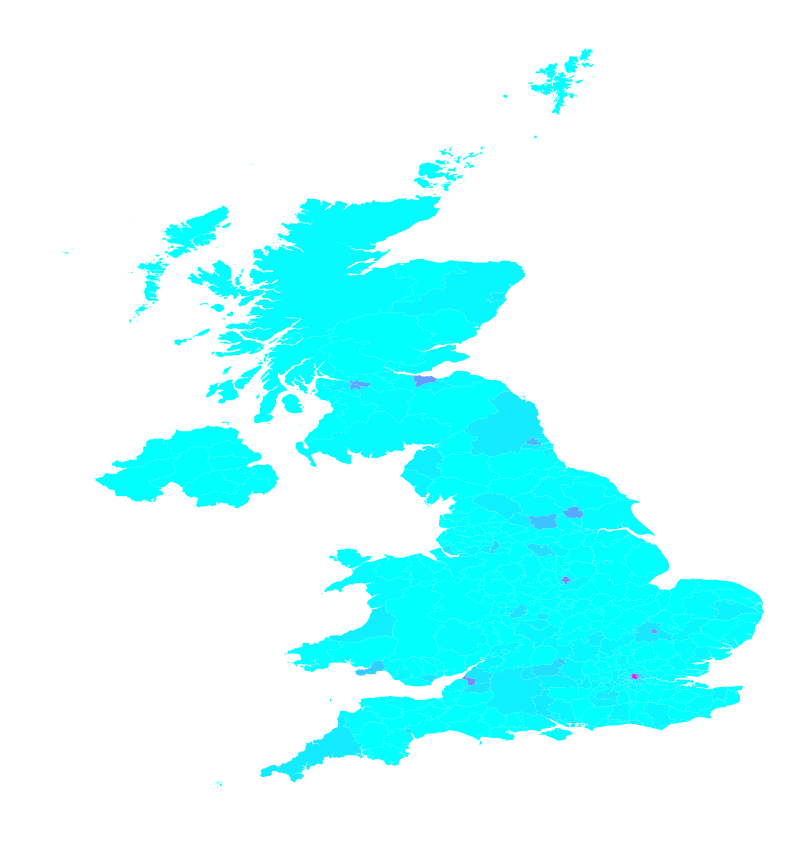

In [19]:
UK_lad['project count']=UK_lad['project count'].fillna(0)


ax=UK_lad.plot(column='project count', cmap='cool', figsize=(15,15))
ax.set_title('')
ax.axis('off')

# Table of local authorities count for all participating organisation

In [20]:
tabs=UK_lad[['lad17nm' ,'project count']].sort_values(by='project count', ascending=False)

#set as integer
tabs['project count']=tabs['project count'].astype(int)

#renames the columns
tabs.rename(columns={'lad17nm':'local authority', 'project count':'project partner count'}, inplace=True)

#drops the index
tabs=tabs.reset_index(drop=True)

tabs.head(n=12)

,local authority,project partner count
0,Westminster,63
1,Camden,50
2,Nottingham,30
3,"Bristol, City of",29
4,Cambridge,25
5,City of Edinburgh,24
6,City of London,22
7,Glasgow City,22
8,Islington,22
9,York,21


In [21]:
tabs.to_clipboard()

# Topic analysis of the data at the intersection of AI and creative

In [22]:
#import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn import metrics  #for the cluster metrics like silhoute score
from sklearn import manifold #for TSNE
import numpy as np
import re
from string import punctuation
from time import time



In [23]:
#Select the data, admittedly a small sample

df=gtr[(gtr['ai_mod']==True) &  (gtr['creative_flag']==1)  ]

column_names = ['abstract']

df[column_names].shape



(93, 1)

Text cleaning

In [26]:


#Sets to lower case
df[column_names] = df[column_names].applymap(lambda x: x.lower())


#Removes the utf characters

def utfremove(x):   #Need the \ to escape the "
   return re.sub(r"u'|u\"", "", x)

df[column_names] = df[column_names].applymap(utfremove)

#Removes new line characters
def nlremove(x):   #Need the \ to escape the "
   return re.sub(r"\\n", "", x)


#Removes hyperlinks

def htmlremove(x):
  return re.sub(r"http\S+", "", x)

df[column_names] = df[column_names].applymap(htmlremove)


#Removes punctuation

def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

df[column_names] = df[column_names].applymap(strip_punctuation)



#Removes numbers

def numremove(x):
    return  re.sub("\d+", "", x)

df[column_names] = df[column_names].applymap(numremove)



#Removes stopwords
def stopremove(x):
 from nltk.corpus import stopwords
 stop = stopwords.words('english')
 querywords = x.split()
  

 stopwords= list(stop_words.ENGLISH_STOP_WORDS)
 resultwords  = [word for word in querywords if word.lower() not in stopwords]
 result = ' '.join(resultwords) 
 return(result)


#Removes the stop words
df[column_names] = df[column_names].applymap(stopremove)



print(df.shape)





(93, 124)


Document term matrix and tfidf

In [27]:
# The tfidf stage

#Maximum number of features
n_features=200

x=df['abstract']


# TfidfVectorizer converts a collection of raw documents to a matrix of TF-IDF features.
#max_df gives the highest proportion of documents that words are allowed to appear in
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, max_features=n_features, stop_words='english',ngram_range=(1,2))
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(x)
print("done in %0.3fs." % (time() - t0))

#Converts the tfidf to a data frame which can be viewed
tfidfdata=pd.DataFrame(tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())

# Use tf (raw term count) features
tf_vectorizer = CountVectorizer(max_df=0.8, min_df=5,  max_features=n_features,stop_words='english', ngram_range=(1,2))
t0 = time()
tf = tf_vectorizer.fit_transform(x)
print("done in %0.3fs." % (time() - t0))
print()


done in 0.170s.
done in 0.135s.



In [28]:
#import print_function

from time import time

n_samples = 2000
n_features = 1000
n_top_words = 10


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]]) #argsort() returns the indices that sort an array
        print(message)
 



print("Fitting LDA models with tf features, " "n_samples=%d and n_features=%d..." % (n_samples, n_features))

#Notes this needs python 3 to work
lda = LatentDirichletAllocation(n_components=3, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

t0 = time()

#Fits the model to the term inverse document frequency matrix
lda.fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names() #Gets the names of the words the tern frequency is defined over
print_top_words(lda, tf_feature_names, n_top_words)

Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 0.385s.

Topics in LDA model:
Topic #0: energy data project social research new digital users business services
Topic #1: care help data disease control security areas research design learning
Topic #2: systems project research game level data using analysis performance develop
